<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/5_LRdatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set-up
import pandas as pd
pd.set_option('display.max_columns', None)

In [118]:
#combine weather and crime for each year

data= []

for year in range(2015,2020):
  weather = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/w_{}.csv'.format(year)).set_index('date')
  crime = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/data/c_day_{}.csv'.format(year)).set_index('date')
  crime.drop('Unnamed: 0', axis=1, inplace=True)
  data.append(crime.join(weather).reset_index())

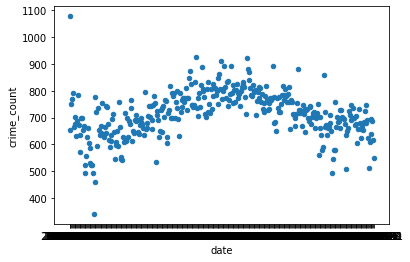

In [56]:
data[4].plot(x = 'date', y = 'crime_count', kind = 'scatter')

In [119]:
# Remove outliers (more than 2 standard deviations from mean)
adjusted = []

for year in range(5):
  df = data[year].copy()
  upper = df.crime_count.mean() + (2 * df.crime_count.std())
  lower = df.crime_count.mean() - (2 * df.crime_count.std())

  df.drop(df[df.crime_count > upper].index, inplace=True)
  df.drop(df[df.crime_count < lower].index, inplace=True)

  adjusted.append(df)

In [120]:
# Normalise crime counts to ensure annual deviations dont skew the model

for year in adjusted:
  min = year.crime_count.min()
  max = year.crime_count.max()
  year.crime_count = (year.crime_count - min) / (max - min)


In [122]:
# Combine all years into single dataset
combined = pd.concat(adjusted)

In [125]:
combined.corr()['crime_count']

day_of_week             0.038562
crime_count             1.000000
mo                      0.205136
temp                    0.711720
dewp                    0.672268
slp                    -0.268781
stp                     0.119537
visib                   0.214685
wdsp                   -0.234855
mxpsd                  -0.148126
gust                   -0.143632
max                     0.707362
min                     0.691606
prcp                    0.003667
sndp                   -0.322452
fog                    -0.089910
rain_drizzle            0.008460
snow_ice_pellets       -0.375999
hail                         NaN
thunder                 0.130229
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64

In [161]:
LR1 = combined[['day_of_week', 'crime_count', 'temp']].copy()
LR2 = combined[['day_of_week', 'crime_count', 'temp', 'sndp']].copy()

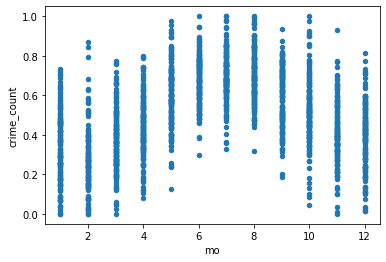

In [162]:
combined.plot(x = 'mo', y = 'crime_count', kind = 'scatter')

In [163]:
# Inspect half year based on crime count curve
half1 = combined.loc[combined['mo'].isin([1,2,3,4,11,12])]
half2 = combined.loc[combined['mo'].isin([5,6,7,8,9,10])]

half1.corr()['crime_count']

LR3_may_oct = half2[['day_of_week', 'crime_count', 'temp']]
LR3_nov_apr = half2[['day_of_week', 'crime_count', 'temp', 'sndp']]

In [139]:
# Inspect individual months
months = []
for month in range(1,13):
  months.append(combined.loc[combined['mo'] == month])

months[11].corr()['crime_count']

In [156]:
# Try an uneven split
q1 = combined.loc[combined['mo'].isin([1,2,3,4])]
summer = combined.loc[combined['mo'].isin([6,7,8])]
other = combined.loc[combined['mo'].isin([5,9])]
q4 = combined.loc[combined['mo'].isin([10,11,12])]

other.corr()['crime_count']

day_of_week             0.043179
crime_count             1.000000
mo                     -0.029949
temp                    0.416983
dewp                    0.330230
slp                    -0.053118
stp                    -0.016696
visib                   0.105570
wdsp                   -0.110157
mxpsd                  -0.079282
gust                   -0.030048
max                     0.419085
min                     0.339634
prcp                   -0.053192
sndp                         NaN
fog                    -0.035716
rain_drizzle           -0.186774
snow_ice_pellets             NaN
hail                         NaN
thunder                -0.071158
tornado_funnel_cloud         NaN
Name: crime_count, dtype: float64